## Evaluating the Information Coefficient

In [1]:
import warnings

In [2]:
import alphalens
import pandas as pd
from alphalens.performance import (
    factor_information_coefficient,
    mean_information_coefficient,
)
from alphalens.plotting import plot_ic_ts, plot_information_table
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [3]:
warnings.filterwarnings("ignore")

Load the mean reversion data

In [4]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

Construct a dataframe with symbols in the columns and dates in the rows for prices

In [5]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

Convert column names to strings

In [6]:
prices.columns = [col.symbol for col in prices.columns]

Normalize Timestamp to midnight, preserving tz information

In [7]:
prices.index = prices.index.normalize()

Construct a dataframe with symbols in the columns and factor rank in the rows

In [8]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

Convert column names to strings

In [9]:
factor_data.columns = [col.symbol for col in factor_data.columns]

Normalize Timestamp to midnight, preserving tz information

In [10]:
factor_data.index = factor_data.index.normalize()

Create a multiindex with date in level 0 and symbol in level 1

In [11]:
factor_data = factor_data.stack()

Rename the multiindexes

In [12]:
factor_data.index.names = ["date", "asset"]

Compile the forward returns, factor rank, and factor quantile using Alphalens

In [13]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Generate the information coefficient for each holding period on each date

In [14]:
ic = factor_information_coefficient(alphalens_data)

Display the information coefficient

In [15]:
display(ic)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-05 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-06 00:00:00+00:00,-0.248066,-0.284107,-0.140796,-0.106800
2016-01-07 00:00:00+00:00,-0.248066,-0.284107,-0.182742,-0.106800
2016-01-08 00:00:00+00:00,-0.248066,-0.263740,-0.182742,-0.085559
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.037130
2017-09-26 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793
2017-09-27 00:00:00+00:00,-0.009765,0.020817,-0.009796,-0.094793


Plot the information table

In [16]:
plot_information_table(ic)

Information Analysis


,5D,10D,21D,63D
IC Mean,0.023,0.031,0.018,0.014
IC Std.,0.186,0.165,0.155,0.166
Risk-Adjusted IC,0.124,0.186,0.116,0.084
t-stat(IC),2.599,3.894,2.426,1.757
p-value(IC),0.010,0.000,0.016,0.080
IC Skew,0.153,0.104,0.530,0.404
IC Kurtosis,-0.247,-0.554,0.246,-0.221


Plot the mean information coefficient

<Axes: >

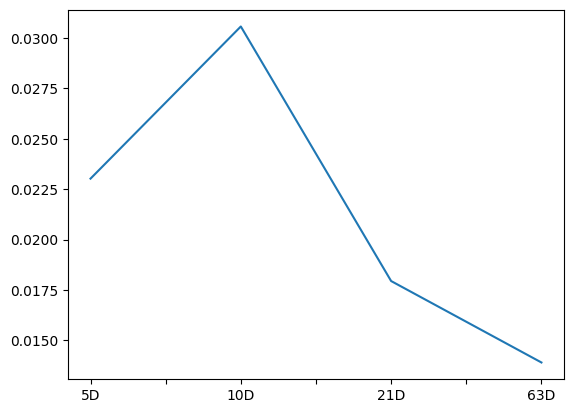

In [17]:
ic_mean = mean_information_coefficient(alphalens_data)
ic_mean.plot()

Plot the IC for the 5-day holding period

array([<Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

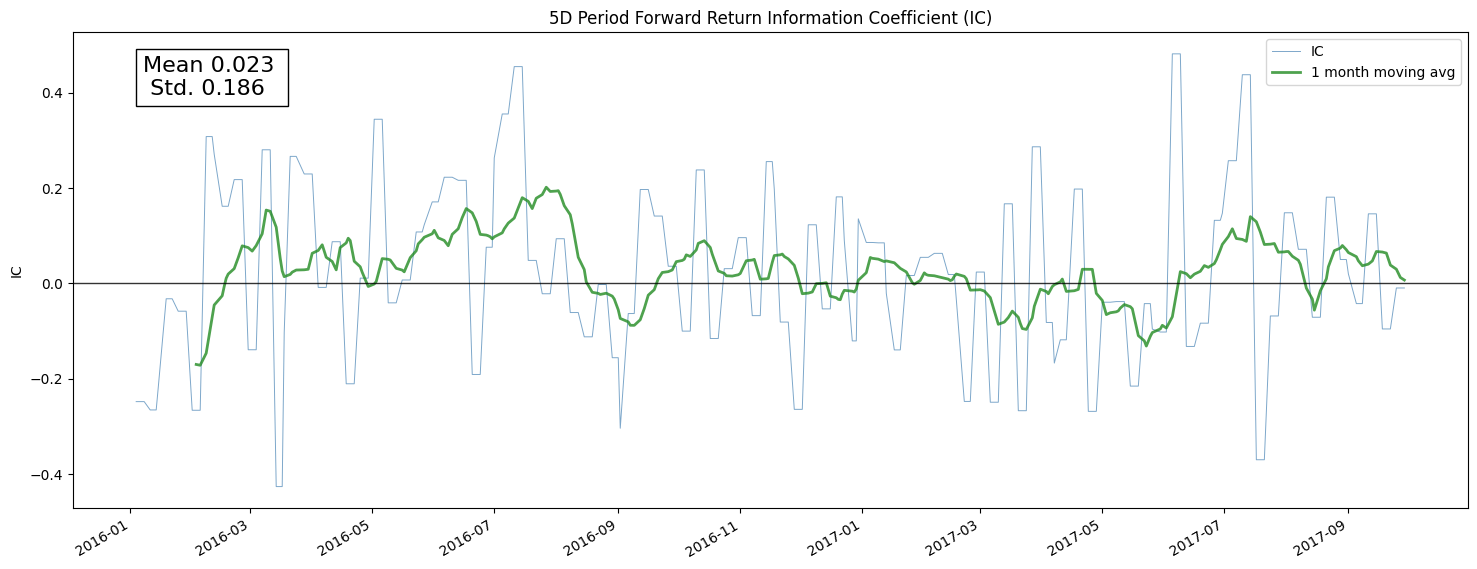

In [18]:
plot_ic_ts(ic[["5D"]])

Plot the IC for the 10-day holding period

array([<Axes: title={'center': '10D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

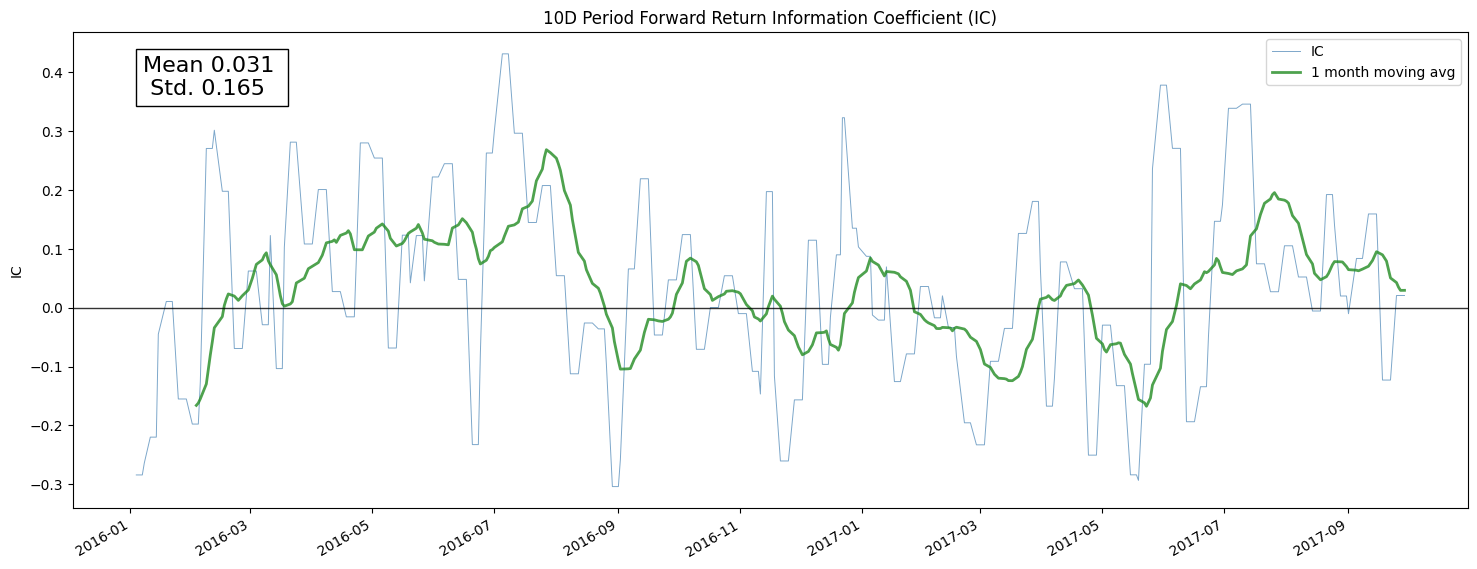

In [19]:
plot_ic_ts(ic[["10D"]])

Calculate and plot the mean IC per holding period per quarter

<Axes: xlabel='date'>

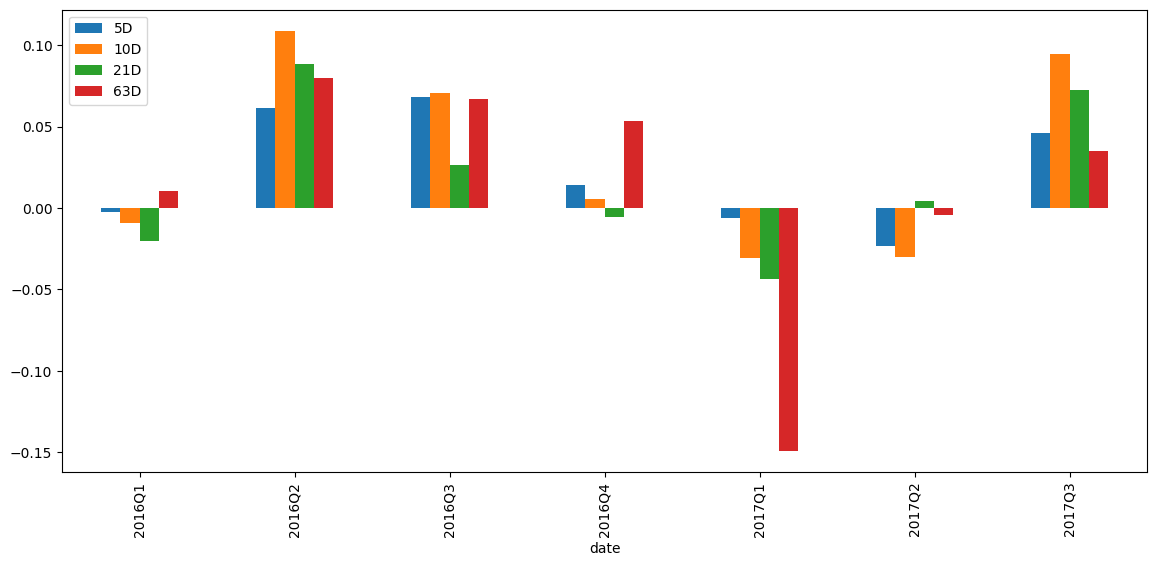

In [20]:
ic_by_quarter = ic.resample("Q").mean()
ic_by_quarter.index = ic_by_quarter.index.to_period("Q")
ic_by_quarter.plot.bar(figsize=(14, 6))

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.